## $$不用框架入门进阶深度学习(3)-线性单元、梯度下降与回归任务$$
### 一、实现线性单元

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
class Perceptron(object):
    def __init__(self, input_feature_num, activation=None):
        self.activation = activation if activation else self.sign
        self.w = [0.0] * input_feature_num
        self.b = 0.0

    def predict(self, x):
        '''
        预测输出函数:
        y_hat = f(wx + b)
        '''
        return self.activation(
            np.dot(self.w, x) + self.b)
    
    def sign(self, z):
        '''
        阶跃激活函数:
        sign(z) = 1 if z > 0
        sign(z) = 0 if z <= 0
        '''
        return int(z>0)
        
    def fit(self, x_train, y_train, iteration=10, learning_rate=0.1):
        # 训练函数
        for _ in range(iteration):
            for x, y in zip(x_train, y_train):
                y_hat = self.predict(x)
                self._update_weights(x, y, y_hat, learning_rate)
            print(self)
    
    def _update_weights(self, x, y, y_hat, learning_rate):
        # 权重更新, 对照公式查看
        delta = y - y_hat
        self.w = np.add(self.w,
                        np.multiply(learning_rate * delta, x))
        self.b += learning_rate * delta
    
    def __str__(self):
        return 'weights: {}\tbias: {}'.format(self.w, self.b)

In [34]:
class LinearUnit(Perceptron):
    def __init__(self, input_feature_num, activation=None):
        self.activation = activation if activation else self.f
        Perceptron.__init__(self, input_feature_num, self.activation)

    def f(self, x):
        return x

### 二、数据准备

In [74]:
def get_training_dataset():
    '''
    捏造5个人的工作年限与对应的收入数据
    '''
    # 输入列表，每一项表示工作年限
    x_train = [[5], [3], [8], [1.4], [10.1]]
    # 期望的输出列表，月薪，注意要与输入一一对应
    y_train = [55000, 23000, 76000, 18000, 114000]
    return x_train, y_train

def get_test_dataset():
    '''
    捏造5个人的工作年限，用模型预测结果
    '''
    # 输入列表，每一项表示工作年限
    x_test = [[1], [2], [4.3], [6.7], [9]]
    return x_test
    

### 三、模型训练-小试调参

weights: [-43264.9316]	bias: -6499.715999999998
weights: [-748.21557461]	bias: -7572.491525913667
weights: [ 6269.1513987]	bias: -7749.55269735544
weights: [ 7427.36501069]	bias: -7778.776572877447
weights: [ 7618.52770407]	bias: -7783.599961842798
weights: [ 7650.07903015]	bias: -7784.396060262173
weights: [ 7655.28656389]	bias: -7784.527455987858
weights: [ 7656.14606526]	bias: -7784.549142799826
weights: [ 7656.28792561]	bias: -7784.552722199454
weights: [ 7656.31133961]	bias: -7784.553312977943


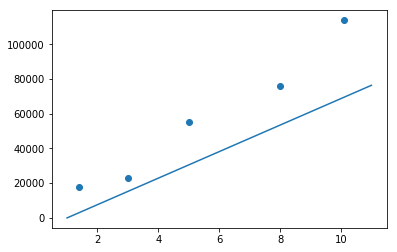

In [75]:
'''
学习率为0.1，收敛不到最优
'''
x_train, y_train = get_training_dataset()
lu = LinearUnit(len(x_train[0]))
lu.fit(x_train, y_train, iteration=10, learning_rate=0.1)

plt.scatter(x_train, y_train)
x_points = np.linspace(1, 11, 10)
y_ = (lu.w[0] * x_points + lu.b)
plt.plot(x_points, y_)

weights: [ 11240.88451468]	bias: 1652.6044668000002
weights: [ 11172.36246933]	bias: 1548.4231937327545
weights: [ 11181.77338601]	bias: 1457.6193688248154
weights: [ 11190.52576246]	bias: 1367.958769494091
weights: [ 11199.16365052]	bias: 1279.5091539946984
weights: [ 11207.68490221]	bias: 1192.2535999327847
weights: [ 11216.0911176]	bias: 1106.1759915016578
weights: [ 11224.38384951]	bias: 1021.2604264670302
weights: [ 11232.56462995]	bias: 937.4912173015192
weights: [ 11240.63497026]	bias: 854.852888258384


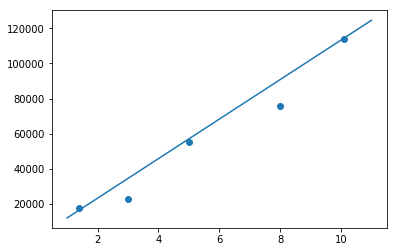

In [76]:
'''
学习率为0.01,收敛效果远远好于学习率为0.1
'''
lu = LinearUnit(len(x_train[0]))
lu.fit(x_train, y_train, iteration=10, learning_rate=0.01)

plt.scatter(x_train, y_train)
x_points = np.linspace(1, 11, 10)
y_ = (lu.w[0] * x_points + lu.b)
plt.plot(x_points, y_)

### 四、预测工资收入

In [77]:
x_test = get_test_dataset()
print(x_test)

[[1], [2], [4.3], [6.7], [9]]


In [78]:
prediction = []
for t in x_test:
    prediction.append(lu.predict(t))
    print('预测工作{}年的AI工程师\t月薪{}'.format(t, prediction[-1]))

预测工作[1]年的AI工程师	月薪12095.487858520604
预测工作[2]年的AI工程师	月薪23336.122828782827
预测工作[4.3]年的AI工程师	月薪49189.58326038593
预测工作[6.7]年的AI工程师	月薪76167.10718901527
预测工作[9]年的AI工程师	月薪102020.56762061837
